In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'deep-learning-mini-project-spring-24-nyu:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F73233%2F8112053%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240411%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240411T223116Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db2d87970769b7b6607a0459d5f251debea6b1e8a6e9361868338f75c55a37878522d4c141c8b3e7cffa6a840dabb2877fa07b821756e293281702e13985ec5947ca708b1f229de4599ef075cfafa7ed962080a2741a21aac7ee2d7e75f603e09b85b8dd7af120ab80b1334436e2889275bbf435af199e5333bb0785d6df47e619de7374b5a32f14f872bb95fd24147ac862502313f1a68329ade7a8e1ed4f2f8a79f95aef9f3a2f995bd825a4558be2120b566b00a3f9b7fecbcd65c5c3bacf6a576b5c7cdca0ba7a1400ae6c22974ca9f4e4889d5ad7f516788e692d85ccf23f5326b639106aee58ccc69967340bc4b29c1765073c0484181aa80a8e5c77b24'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 197959970 bytes downloaded
Downloaded and uncompressed: deep-learning-mini-project-spring-24-nyu
Data source import complete.


In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar_test_nolabels.pkl
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/readme.html
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/batches.meta
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/test_batch


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
import torchvision
from torch import optim
import time
import matplotlib.pyplot as plt
import os
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from torchvision import transforms, models
import torch

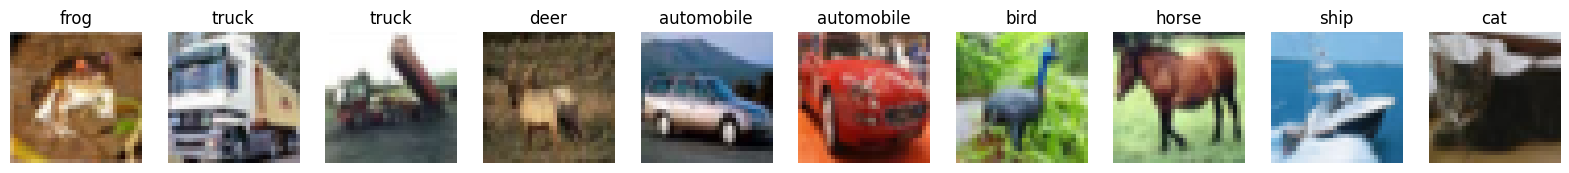

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

def load_cifar_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Specify the folder where the CIFAR-10 batch files are
cifar10_dir = '/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/'

# Load the label names
meta_data_dict = load_cifar_batch(os.path.join(cifar10_dir, 'batches.meta'))
label_names = meta_data_dict[b'label_names']

# Load one batch for demonstration (e.g., data_batch_1)
batch_1_dict = load_cifar_batch(os.path.join(cifar10_dir, 'data_batch_1'))
train_images = batch_1_dict[b'data']
train_labels = batch_1_dict[b'labels']

# Reshape the images
train_images = train_images.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)

# Display the first 10 images and labels
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])
    plt.title(label_names[train_labels[i]].decode('utf-8'))  # Decoding from bytes to string
    plt.axis('off')
plt.show()


In [24]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class CIFARDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        """
        images: numpy array of shape (N, H, W, C)
        labels: numpy array of shape (N,)
        transform: PyTorch transforms for transforms and data augmentation
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Convert the image from numpy array to PIL Image to apply transform
        image = Image.fromarray(self.images[idx])
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [25]:
from torchvision.transforms import Compose, ToTensor, RandomHorizontalFlip, RandomCrop, ColorJitter, RandomRotation, RandomErasing

normalize_transform = transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])

# Data augmentation and normalization for training
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # Pad by 4 pixels on each side, and then randomly crop a 32x32 image
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.ToTensor(),  # Convert PIL images to tensors
    normalize_transform,  # Normalize with mean and std for 3 channels
])

# Only normalization for testing
test_transforms = Compose([
    ToTensor(),
    normalize_transform,
])

In [26]:
def load_and_combine_batches(batch_files):
    data_list = []
    labels_list = []

    for file_name in batch_files:
        batch = load_cifar_batch(file_name)
        data_list.append(batch[b'data'])
        labels_list.append(batch[b'labels'])

    combined_data = np.concatenate(data_list)
    combined_labels = np.concatenate(labels_list)

    return combined_data, combined_labels

# Paths to your CIFAR-10 batch files
cifar10_dir = '/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py'
batch_files = [os.path.join(cifar10_dir, f'data_batch_{i}') for i in range(1, 6)]

# Load and combine batches
train_images, train_labels = load_and_combine_batches(batch_files)
test_images, test_labels = load_and_combine_batches(['/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/test_batch'])


# Convert to PyTorch tensors
train_images = train_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_images = test_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Create a TensorDataset
train_dataset = CIFARDataset(train_images, train_labels, transform=train_transforms)
test_dataset = CIFARDataset(test_images, test_labels, transform=test_transforms)

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

Code reference :  K. Liu, "pytorch-cifar," GitHub repository, 2023. [Online]. Available: https://github.com/kuangliu/pytorch-cifar\par

In [27]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, conv_kernel_size=3, shortcut_kernel_size=1, drop=0.4):
        """
        Convolutional Layer kernel size Fi
        Skip connection (shortcut) kernel size Ki
        """
        super(BasicBlock, self).__init__()
        self.drop = drop
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=conv_kernel_size, stride=stride, padding=int(conv_kernel_size/2), bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=conv_kernel_size,stride=1, padding=int(conv_kernel_size/2), bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,kernel_size=shortcut_kernel_size, stride=stride, padding=int(shortcut_kernel_size/2), bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )
        if self.drop: self.dropout = nn.Dropout(self.drop)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        if self.drop: out = self.dropout(out)
        return out


In [28]:
def conv1x1(in_channels,
            out_channels,
            stride=1,
            groups=1,
            bias=False):
    """
    Convolution 1x1 layer.
    Parameters:
    ----------
    in_channels : int
        Number of input channels.
    out_channels : int
        Number of output channels.
    stride : int or tuple/list of 2 int, default 1
        Strides of the convolution.
    groups : int, default 1
        Number of groups.
    bias : bool, default False
        Whether the layer uses a bias vector.
    """
    return nn.Conv2d(
        in_channels=in_channels,
        out_channels=out_channels,
        kernel_size=1,
        stride=stride,
        groups=groups,
        bias=bias)

In [29]:
class SEBlock(nn.Module):
    """
    Reference : Squeeze-and-Excitation block from 'Squeeze-and-Excitation Networks,' https://arxiv.org/abs/1709.01507.

    """
    def __init__(self,
                 channels,
                 reduction=16):
        super(SEBlock, self).__init__()
        mid_cannels = channels // reduction

        self.pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv1 = conv1x1(
            in_channels=channels,
            out_channels=mid_cannels,
            bias=True)
        self.activ = nn.ReLU(inplace=True)

        self.conv2 = conv1x1(
            in_channels=mid_cannels,
            out_channels=channels,
            bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        w = self.pool(x)
        w = self.conv1(w)
        w = self.activ(w)
        w = self.conv2(w)
        w = self.sigmoid(w)
        x = x * w
        return x

In [30]:
class ResNet(nn.Module):
    def __init__(
            self,
            block,
            num_blocks,
            conv_kernel_sizes=None,
            shortcut_kernel_sizes=None,
            num_classes=10,
            num_channels=32,
            avg_pool_kernel_size=4,
            drop=None,
            squeeze_and_excitation=None):
        super(ResNet, self).__init__()
        self.in_planes = num_channels
        # self.avg_pool_kernel_size = avg_pool_kernel_size
        self.avg_pool_kernel_size = int(32 / (2**(len(num_blocks)-1)))

        """
        # of channels Ci
        """
        self.num_channels = num_channels
        self.conv1 = nn.Conv2d(3, self.num_channels, kernel_size=3,stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.num_channels)

        self.drop = drop
        self.squeeze_and_excitation = squeeze_and_excitation

        if self.squeeze_and_excitation:
            self.seblock = SEBlock(channels=self.num_channels)

        """
        # of Residual Layers N
        # of Residual Blocks Bi
        """
        self.residual_layers = []
        for n in range(len(num_blocks)):
            stride = 1 if n==0 else 2 # stride=1 for first residual layer, and stride=2 for the remaining layers
            conv_kernel_size = conv_kernel_sizes[n] if conv_kernel_sizes else 3 # setting default kernel size of block's convolutional layers
            shortcut_kernel_size = shortcut_kernel_sizes[n] if shortcut_kernel_sizes else 1 # setting default kernel size of block's skip connection (shortcut) layers
            self.residual_layers.append(self._make_layer(
                                                    block,
                                                    self.num_channels*(2**n),
                                                    num_blocks[n],
                                                    stride=stride,
                                                    conv_kernel_size=conv_kernel_size,
                                                    shortcut_kernel_size=shortcut_kernel_size))

        self.residual_layers = nn.ModuleList(self.residual_layers)
        self.linear = nn.Linear(self.num_channels*(2**n)*block.expansion, num_classes)
        """
        Dropout layer
        """
        if self.drop:
            self.dropout = nn.Dropout(self.drop) # Define proportion or neurons to dropout

    def _make_layer(self, block, planes, num_blocks, stride, conv_kernel_size, shortcut_kernel_size):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, conv_kernel_size, shortcut_kernel_size, drop=self.drop))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        if self.squeeze_and_excitation: out = self.seblock(out)
        for layer in self.residual_layers:
            out = layer(out)
        """
        Average pool kernel size
        """
        out = F.avg_pool2d(out, self.avg_pool_kernel_size)
        out = out.view(out.size(0), -1)
        if self.drop: out = self.dropout(out)
        out = self.linear(out)
        return out



I've also taken lookahead optimizer from below reference
# Reference: https://github.com/alphadl/lookahead.pytorch.git

In [31]:
import torch
from collections import defaultdict
from itertools import chain

class Lookahead(torch.optim.Optimizer):
    def __init__(self, optimizer, k=5, alpha=0.5):
        if not isinstance(optimizer, torch.optim.Optimizer):
            raise ValueError(f"Invalid optimizer: {optimizer}")
        self.optimizer = optimizer
        self.k = k
        self.alpha = alpha
        self.param_groups = self.optimizer.param_groups
        self.state = defaultdict(dict)
        self.fast_state = self.optimizer.state
        self.defaults = optimizer.defaults

        # Initialize new attributes for compatibility with PyTorch hooks
        self._step_count = 0
        self._optimizer_step_pre_hooks = defaultdict(dict)

        for group in self.param_groups:
            group["counter"] = 0

    def update(self, group):
        for fast in group["params"]:
            param_state = self.state[fast]
            if "slow_param" not in param_state:
                param_state["slow_param"] = torch.zeros_like(fast.data)
                param_state["slow_param"].copy_(fast.data)
            slow = param_state["slow_param"]
            slow += (fast.data - slow) * self.alpha
            fast.data.copy_(slow)

    def update_lookahead(self):
        for group in self.param_groups:
            self.update(group)

    def step(self, closure=None):
        loss = self.optimizer.step(closure)
        for group in self.param_groups:
            if group["counter"] == 0:
                self.update(group)
            group["counter"] += 1
            if group["counter"] >= self.k:
                group["counter"] = 0
        return loss

    def zero_grad(self, set_to_none=False):
        self.optimizer.zero_grad(set_to_none=set_to_none)

    def state_dict(self):
        fast_state_dict = self.optimizer.state_dict()
        slow_state = {
            (id(k) if isinstance(k, torch.Tensor) else k): v
            for k, v in self.state.items()
        }
        fast_state = fast_state_dict["state"]
        param_groups = fast_state_dict["param_groups"]
        return {
            "fast_state": fast_state,
            "slow_state": slow_state,
            "param_groups": param_groups,
        }

    def load_state_dict(self, state_dict):
        slow_state_dict = {
            "state": state_dict["slow_state"],
            "param_groups": state_dict["param_groups"],
        }
        fast_state_dict = {
            "state": state_dict["fast_state"],
            "param_groups": state_dict["param_groups"],
        }
        super(Lookahead, self).load_state_dict(slow_state_dict)
        self.optimizer.load_state_dict(fast_state_dict)
        self.fast_state = self.optimizer.state

    def add_param_group(self, param_group):
        param_group["counter"] = 0
        self.optimizer.add_param_group(param_group)

The ResNet architecture is configured here with three sets of residual blocks, each with different layers and kernel sizes. This network uses BasicBlocks as its fundamental building unit, with each block featuring a squeeze-and-excitation mechanism for channel recalibration, enhancing the representational capacity of the network. The network starts with 64 channels, uses 1x1 and 3x3 convolutions for shortcut connections and regular layers respectively, and concludes with an 8x8 average pooling before the final classification layer. The model is prepared for training on a CUDA-enabled device for GPU acceleration.


In [32]:
#Resnet architecture
net =  ResNet(
            block=BasicBlock,
            num_blocks=[4, 4, 3],
            conv_kernel_sizes=[3, 3, 3],
            shortcut_kernel_sizes=[1, 1, 1] ,
            num_channels=64,
            avg_pool_kernel_size=8,
            drop=0.0,
            squeeze_and_excitation=1
        )


net = net.cuda()




This configuration sets up the SGD optimizer with momentum and weight decay, enhanced by the Lookahead mechanism to periodically aggregate updates, aiming for smoother and more stable optimization. The Cosine Annealing Learning Rate Scheduler is employed to adjust the learning rate following a cosine curve over 200 epochs, facilitating effective convergence by gradually decreasing the learning rate.


In [18]:
#optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-5)
#Taking SGD optimizer with some parameters
optimizer = optim.SGD(net.parameters(), lr=0.1,momentum= 0.9,  weight_decay= 0.0005 )
optimizer = Lookahead(optimizer, k=5, alpha=0.5)
from torch.optim.lr_scheduler import ReduceLROnPlateau

#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
from torch.optim.lr_scheduler import OneCycleLR

N_EPOCHS=200
#scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=N_EPOCHS)

from torch.optim.lr_scheduler import CosineAnnealingLR

# Assuming optimizer is already defined
T_max = N_EPOCHS  # Number of epochs for a single cycle
scheduler = CosineAnnealingLR(optimizer, T_max=T_max)

This `EarlyStopping` class monitors the validation loss during training, halting the process if there's no improvement after a specified patience period, effectively preventing overfitting and saving computational resources.


In [19]:

class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                           Default: 0
            path (str): Path for the checkpoint to be saved to.
                        Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model, optimizer, epoch, scheduler):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model, optimizer, epoch, scheduler)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model, optimizer, epoch, scheduler)
            self.counter = 0

    def save_checkpoint(self, val_loss, model, optimizer, epoch, scheduler):
        '''Saves model, optimizer, epoch, scheduler state when validation loss decreases.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_loss': val_loss
        }, self.path)
        self.val_loss_min = val_loss


This Python code implements the CutMix augmentation, where parts of images are cut and pasted among training images and their labels are mixed proportionally to the area of swap. The rand_bbox function generates the bounding box for the region to be cut based on the lambda parameter from a beta distribution.

In [23]:

def cutmix(data, targets, alpha):
    # Generate mixed sample, targets, and lambda
    indices = torch.randperm(data.size(0)).to(data.device)
    shuffled_data = data[indices]
    shuffled_targets = targets[indices]

    lam = np.random.beta(alpha, alpha)
    bbx1, bby1, bbx2, bby2 = rand_bbox(data.size(), lam)
    new_data = data.clone()
    new_data[:, :, bbx1:bbx2, bby1:bby2] = shuffled_data[:, :, bbx1:bbx2, bby1:bby2]
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (data.size(-1) * data.size(-2)))

    return new_data, targets, shuffled_targets, lam


def rand_bbox(size, lam):
    """Generate random bounding box."""
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)  # Use Python's built-in int
    cut_h = int(H * cut_rat)  # Use Python's built-in int

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2



In [24]:

def train_epoch(model, optimizer, scheduler, data_loader, loss_history, cutmix_prob=0.5, alpha=1.0):
    total_samples = len(data_loader.dataset)
    model.train()

    for i, (data, target) in enumerate(data_loader):
        data, target = data.cuda(), target.cuda()

        # Decide whether to apply CutMix based on probability
        if np.random.rand() < cutmix_prob:
            # Apply CutMix
            data, targets_a, targets_b, lam = cutmix(data, target, alpha)
            outputs = model(data)
            loss = lam * F.nll_loss(F.log_softmax(outputs, dim=1), targets_a) + (1 - lam) * F.nll_loss(F.log_softmax(outputs, dim=1), targets_b)
        else:
            # Normal training process
            outputs = model(data)
            loss = F.nll_loss(F.log_softmax(outputs, dim=1), target)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.1)
        optimizer.step()

        if i % 100 == 0:
            print('[' +  '{:5}'.format(i * len(data)) + '/' + '{:5}'.format(total_samples) +
                  ' (' + '{:3.0f}'.format(100 * i / len(data_loader)) + '%)]  Loss: ' +
                  '{:6.4f}'.format(loss.item()))
            loss_history.append(loss.item())

In [25]:
def evaluate(model, data_loader, loss_history):
    model.eval()

    total_samples = len(data_loader.dataset)
    correct_samples = 0
    total_loss = 0

    with torch.no_grad():
        for data, target in data_loader:
            data = data.cuda()
            target = target.cuda()
            output = F.log_softmax(model(data), dim=1)
            loss = F.nll_loss(output, target, reduction='sum')
            _, pred = torch.max(output, dim=1)

            total_loss += loss.item()
            correct_samples += pred.eq(target).sum()
            #scheduler.step()

    avg_loss = total_loss / total_samples
    loss_history.append(avg_loss)
    print('\nAverage test loss: ' + '{:.4f}'.format(avg_loss) +
          '  Accuracy:' + '{:5}'.format(correct_samples) + '/' +
          '{:5}'.format(total_samples) + ' (' +
          '{:4.2f}'.format(100.0 * correct_samples / total_samples) + '%)\n')
    return avg_loss

In [26]:
N_EPOCHS = 200
early_stopping = EarlyStopping(patience=80, verbose=True, path='best_model.pt')
start_time = time.time()

train_loss_history, test_loss_history = [], []
for epoch in range(1, N_EPOCHS + 1):

    print('Epoch:', epoch)
    train_epoch(net, optimizer, scheduler, train_loader, train_loss_history)
    val_loss = evaluate(net, test_loader, test_loss_history)
    #scheduler.step(val_loss)
    scheduler.step()
    early_stopping(val_loss, net, optimizer, epoch, scheduler)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break


print('Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')

Epoch: 1
[    0/50000 (  0%)]  Loss: 2.5266
[12800/50000 ( 26%)]  Loss: 1.7186
[25600/50000 ( 51%)]  Loss: 1.7209
[38400/50000 ( 77%)]  Loss: 1.5777

Average test loss: 1.3822  Accuracy: 5004/10000 (50.04%)

Validation loss decreased (inf --> 1.382231).  Saving model ...
Epoch: 2
[    0/50000 (  0%)]  Loss: 2.0403
[12800/50000 ( 26%)]  Loss: 2.0566
[25600/50000 ( 51%)]  Loss: 1.8602
[38400/50000 ( 77%)]  Loss: 1.2625

Average test loss: 1.2763  Accuracy: 5355/10000 (53.55%)

Validation loss decreased (1.382231 --> 1.276271).  Saving model ...
Epoch: 3
[    0/50000 (  0%)]  Loss: 1.3084
[12800/50000 ( 26%)]  Loss: 1.6715
[25600/50000 ( 51%)]  Loss: 1.1493
[38400/50000 ( 77%)]  Loss: 1.1119

Average test loss: 1.1325  Accuracy: 5919/10000 (59.19%)

Validation loss decreased (1.276271 --> 1.132493).  Saving model ...
Epoch: 4
[    0/50000 (  0%)]  Loss: 0.9927
[12800/50000 ( 26%)]  Loss: 0.9853
[25600/50000 ( 51%)]  Loss: 1.0608
[38400/50000 ( 77%)]  Loss: 1.7957

Average test loss: 1.095

In [17]:
import torch

# Load the entire model
model = torch.load('best_model.pt')

In [28]:

# Load the batch
cifar10_pickle = load_cifar_batch('/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar_test_nolabels.pkl')

# Extract images
images_pickle = cifar10_pickle[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
ids_pickle = cifar10_pickle[b'ids']

In [29]:
# Assuming images is already loaded from your pickle file and reshaped correctly
images_tensor = torch.tensor(images_pickle, dtype=torch.float) / 255.0  # Normalize to [0, 1]
images_tensor = images_tensor.permute(0, 3, 1, 2)  # Change to PyTorch format (N, C, H, W)

# Normalize the images (adjust mean and std as per your training data)
normalize_transform = transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
images_normalized = normalize_transform(images_tensor)

# Move the images to GPU if available
images_normalized = images_normalized.cuda()


In [30]:
batch_size = 500
images_batches = [images_normalized[i:i+batch_size] for i in range(0, len(images_normalized), batch_size)]
net.eval()  # Set the model to evaluation mode

# Loop through the batches and perform inference
predicted_labels = []
for batch in images_batches:
    with torch.no_grad():
        outputs = net(batch)
        _, batch_predicted_labels = torch.max(outputs, 1)
        predicted_labels.extend(batch_predicted_labels.cpu().numpy())

In [31]:


# Create a DataFrame with the predicted labels
submission_df = pd.DataFrame({
    "ID": ids_pickle,
    "Labels": predicted_labels
})

# Save the DataFrame to a CSV file
submission_csv_path = '/content/cifar_test_predictions.csv'
submission_df.to_csv(submission_csv_path, index=False)

print(f"Submission file saved to {submission_csv_path}")


Submission file saved to /content/cifar_test_predictions.csv


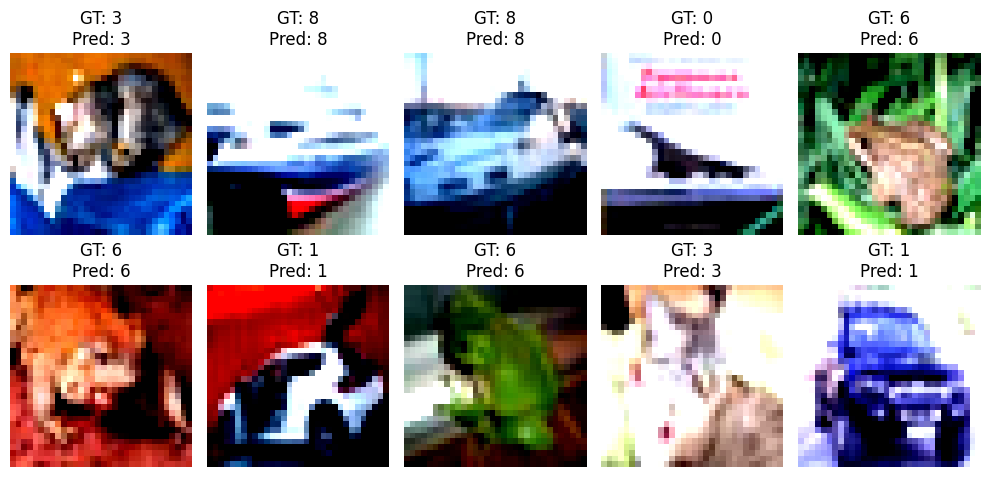

In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load the entire model
state_dict = torch.load('best_model.pt')
net.load_state_dict(state_dict['model_state_dict'])

net = net.cuda()

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

def visualize_predictions(model, data_loader):
    model.eval()
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    # Ensure images and labels are on the same device as the model
    images, labels = images.to(device), labels.to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Plot images
    plt.figure(figsize=(10, 5))
    for i in range(10):  # Ensure your DataLoader batch size is at least 10
        ax = plt.subplot(2, 5, i + 1)
        imshow(images[i].cpu())  # Move images to cpu for plotting
        ax.set_title(f'GT: {labels[i].item()}\nPred: {predicted[i].item()}')

    plt.tight_layout()
    plt.show()

# Assuming 'test_loader' is defined
visualize_predictions(net, test_loader)
